### Import Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.nn as nn

import torchvision.utils as vutils
from io import open
import os
from PIL import Image
import sys

import models.resnet as ResNet
import models.senet as SENet

import torchvision.models as models
import pickle

import pandas as pd

import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
from models import resnet, resnet50_ferplus_dag, resnet50_ft_dag, resnet50_scratch_dag, senet, senet50_ferplus_dag, senet50_ft_dag, senet50_scratch_dag, vgg_face_dag, vgg_m_face_bn_dag

### Choose Architecture:

In [3]:


############  CHOOSE HERE WHICH ALGORITHM YOU WANT: #################

# model = resnet50_ft_dag.resnet50_ft_dag(weights_path='Weights/resnet50_ft_dag.pth')
# SaveAs = 'ResNet50_MS1M_'


# model = resnet50_scratch_dag.resnet50_scratch_dag(weights_path='Weights/resnet50_scratch_dag.pth')
# SaveAs = 'ResNet50_VggFace2_'

model = senet50_ft_dag.senet50_ft_dag(weights_path='Weights/senet50_ft_dag.pth')
# SaveAs = 'SeNet50_MS1M_'

# model = senet50_scratch_dag.senet50_scratch_dag(weights_path='Weights/senet50_scratch_dag.pth')
# SaveAs = 'SeNet50_VggFace2_'

######################################################################





scaler = transforms.Scale((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


to_tensor = transforms.ToTensor()

model.eval()

C:\Users\Public\Anaconda3\envs\Pytorch\lib\site-packages\torchvision\transforms\transforms.py:310: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


Senet50_ft_dag(
  (conv1_7x7_s2): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (conv1_7x7_s2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_relu_7x7_s2): ReLU()
  (pool1_3x3_s2): MaxPool2d(kernel_size=[3, 3], stride=[2, 2], padding=(0, 0), dilation=1, ceil_mode=True)
  (conv2_1_1x1_reduce): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2_1_1x1_reduce_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_1_1x1_reduce_relu): ReLU()
  (conv2_1_3x3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2_1_3x3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_1_3x3_relu): ReLU()
  (conv2_1_1x1_increase): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2_1_1x1_increase_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

### Get Euclidean Distance of penultimal Layers between pairs of faces:

In [59]:
def RunModel(img_url_1,img_url_2):
    
    imagepath = img_url_1
    image = Image.open(imagepath)
    imgblob = Variable(normalize(to_tensor(image)).unsqueeze(0))
    output1 = model(imgblob)
    output1 = output1[1].flatten()
    
        
        
    imagepath = img_url_2
    image = Image.open(imagepath)
    imgblob = Variable(normalize(to_tensor(image)).unsqueeze(0))
    output2 = model(imgblob)
    output2 = output2[1].flatten()
        
    

    dist = np.linalg.norm(output1.detach().numpy()-output2.detach().numpy())
#     print(dist)
    
    return(dist)

### Run: 

### Run: 

In [60]:
list_dir = os.listdir('C:/Users/Public/Documents/PNAS2018Images/SeparatedImages/')

In [61]:
list_dir = list_dir[1:]

In [62]:
list_dir

['D1_a.png',
 'D1_b.png',
 'D2_a.png',
 'D2_b.png',
 'D3_a.png',
 'D3_b.png',
 'D4_a.png',
 'D4_b.png',
 'D5_a.png',
 'D5_b.png',
 'D6_a.png',
 'D6_b.png',
 'D7_a.png',
 'D7_b.png',
 'D8_a.png',
 'D8_b.png',
 'S10_a.png',
 'S10_b.png',
 'S11_a.png',
 'S11_b.png',
 'S12_a.png',
 'S12_b.png',
 'S1_a.png',
 'S1_b.png',
 'S2_a.png',
 'S2_b.png',
 'S3_a.png',
 'S3_b.png',
 'S4_a.png',
 'S4_b.png',
 'S5_a.png',
 'S5_b.png',
 'S6_a.png',
 'S6_b.png',
 'S7_a.png',
 'S7_b.png',
 'S8_a.png',
 'S8_b.png',
 'S9_a.png',
 'S9_b.png']

In [63]:
model_result=[]
for i in range(0,40,2):
    try:
        model_result.append(RunModel('C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i],'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i+1]))
    except:
        print(list_dir[i])
        print(list_dir[i+1])

S8_a.png
S8_b.png


In [64]:
# Show the scores
for i in range(len(model_result)):
    print(model_result[i])

1.7322009
1.1989387
4.4591928
1.3510814
2.6296053
2.831309
2.6759534
4.3459625
2.5112581
10.682509
5.7089863
2.3192117
1.5090001
1.9497765
3.138979
1.2775304
7.810482
3.4668612
2.2346666


In [65]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(11):
    ground_truth.append('same')
    


In [66]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(model_result),pos_label='different')

In [67]:
fpr,tpr,thresholds

(array([0.        , 0.09090909, 0.27272727, 0.27272727, 0.45454545,
        0.45454545, 0.81818182, 0.81818182, 0.90909091, 0.90909091,
        1.        , 1.        ]),
 array([0.   , 0.   , 0.   , 0.25 , 0.25 , 0.625, 0.625, 0.75 , 0.75 ,
        0.875, 0.875, 1.   ]),
 array([11.682509 , 10.682509 ,  5.7089863,  4.3459625,  3.138979 ,
         2.6296053,  1.9497765,  1.7322009,  1.5090001,  1.3510814,
         1.2775304,  1.1989387], dtype=float32))

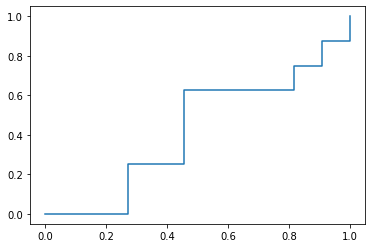

In [68]:
plt.plot(fpr,tpr)

In [69]:
sklearn.metrics.auc(fpr,tpr)

0.42045454545454547